In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Daten laden
df = pd.read_csv('titanic.csv') 

In [3]:
# 1. Fehlende Werte checken
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


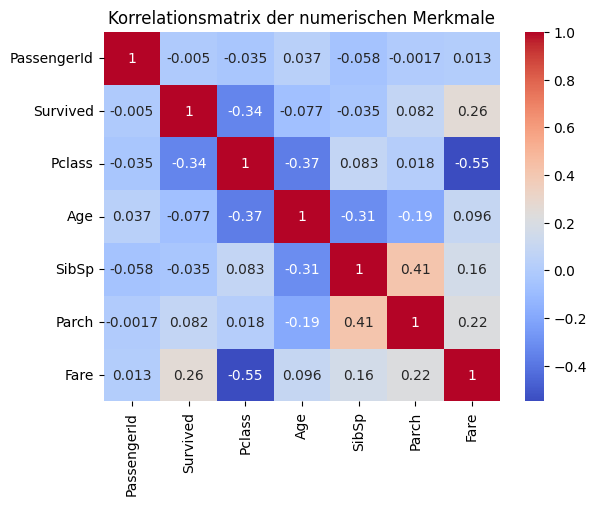

In [4]:
# 2. Korrelationen (nur numerische Spalten)
plt.title('Korrelationsmatrix der numerischen Merkmale')
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()


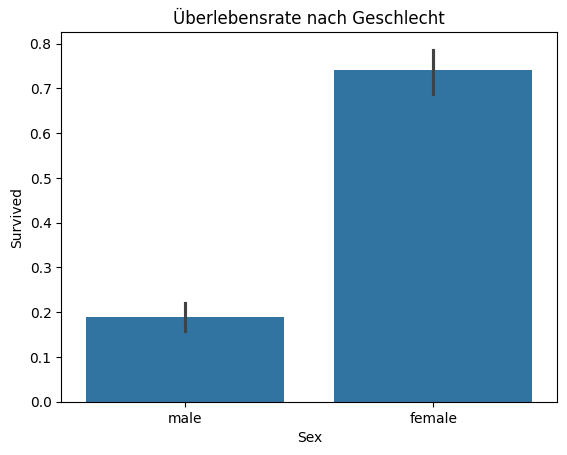

In [5]:
# 3. Überlebensrate nach Geschlecht
plt.title('Überlebensrate nach Geschlecht')
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

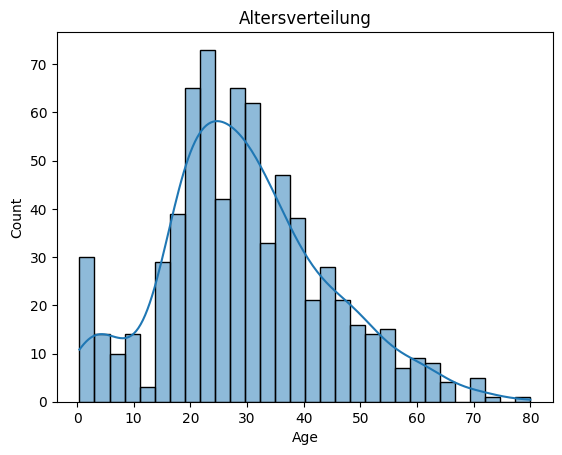

In [6]:
# Altersverteilung
plt.title('Altersverteilung')
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.show()

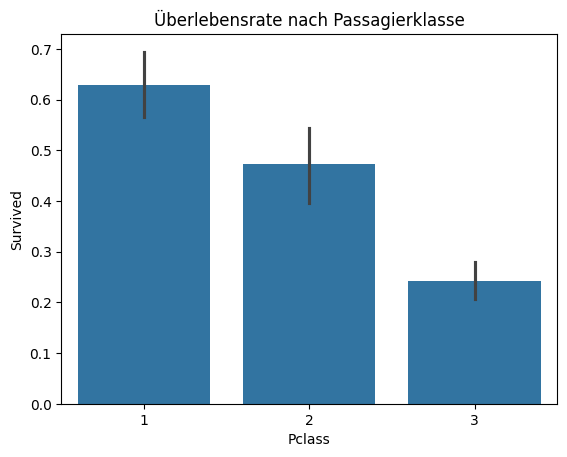

In [7]:
# Überlebensrate nach Passagierklasse
plt.title('Überlebensrate nach Passagierklasse')
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

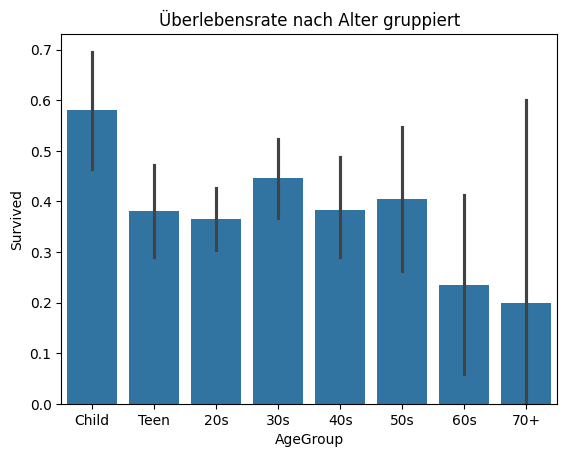

In [8]:
# Überlebensrate nach Alter gruppiert
plt.title('Überlebensrate nach Alter gruppiert')
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 30, 40, 50, 60, 70, 80], labels=['Child', 'Teen', '20s', '30s', '40s', '50s', '60s', '70+'])
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.show()  

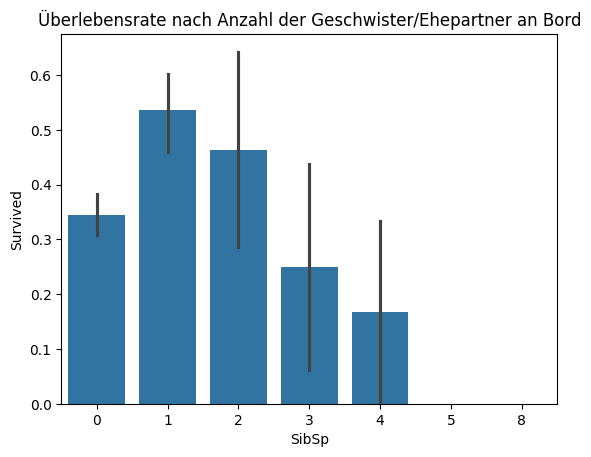

In [9]:
# Überlebensrate nach Anzahl der Geschwister/Ehepartner an Bord
plt.title('Überlebensrate nach Anzahl der Geschwister/Ehepartner an Bord')
sns.barplot(x='SibSp', y='Survived', data=df)
plt.show()

In [10]:
# Part 2: Machine Learning Basics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
#Daten vorbereiten für ML
df_ml = df.copy() # Kopie des DataFrames erstellen
df_ml['Sex'] = df_ml['Sex'].map({'male': 0, 'female': 1}) # Geschlecht in nummern umwandeln
df_ml['Embarked'] = df_ml['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) # Embarked in nummern umwandeln
df_ml['Age'].fillna(df_ml['Age'].median(), inplace=True) # Fehlende Werte in Age mit Median auffüllen
df_ml['Fare'].fillna(df_ml['Fare'].median(), inplace=True) # Fehlende Werte in Fare mit Median auffüllen
df_ml.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True) # Unnötige Spalten entfernen



C:\Users\jansc\AppData\Local\Temp\ipykernel_22320\1220296899.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml['Age'].fillna(df_ml['Age'].median(), inplace=True) # Fehlende Werte in Age mit Median auffüllen
C:\Users\jansc\AppData\Local\Temp\ipykernel_22320\1220296899.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

In [12]:
X = df_ml[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] # Merkmale auswählen
y = df_ml['Survived'] # Zielvariable auswählen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Daten aufteilen

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42) # Modell initialisieren
clf.fit(X_train, y_train) # Modell trainieren
y_pred = clf.predict(X_test) # Vorhersagen machen
print("Confusion Matrix:") 
print(confusion_matrix(y_test, y_pred)) 
print("\nClassification Report:") 
print(classification_report(y_test, y_pred)) 
# mcc
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc}')


Confusion Matrix:
[[92 13]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Matthews Correlation Coefficient: 0.6404085582091086
